## Introduction to PyTSPL

This tutorial will show you the basic functionality of the toolbox. After installing the package with pip, start by opening a python shell, e.g. a Jupyter notebook, and import the PyTSPL.

Let's start by building a simplicial complex by using the built-in dataset loader. Once we load the dataset, we will get a summary of the simplcial complex (SC). Additionally, we will get the coordinates and the flow of the SC.

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)
os.getcwd()

'/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/pytspl'

### Loading from a dataset

Before loading a dataset, we can list the available datasets that are currently available.

In [19]:
from pytspl import list_datasets

list_datasets()

['barcelona',
 'chicago-regional',
 'siouxfalls',
 'anaheim',
 'test_dataset',
 'goldcoast',
 'winnipeg',
 'chicago-sketch',
 'paper',
 'forex',
 'lastfm-1k-artist',
 'wsn']

Now, let's load a dataset and get a summary of the simplicial complex.


In [3]:
from pytspl import load_dataset

sc, coordinates, flow = load_dataset("paper")

Num. of nodes: 7
Num. of edges: 10
Num. of triangles: 3
Shape: (7, 10, 3)
Max Dimension: 2
Coordinates: 7
Flow: 10


We can plot the network using the SCPlot module.

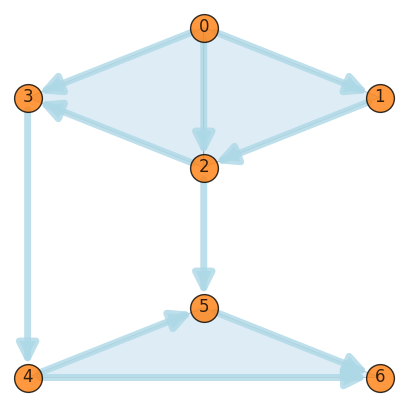

In [8]:
from pytspl import SCPlot
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1, 1, 1)

scplot = SCPlot(simplical_complex=sc, coordinates=coordinates)
scplot.draw_network(ax=ax)

We can also plot the SC with its edge flow.

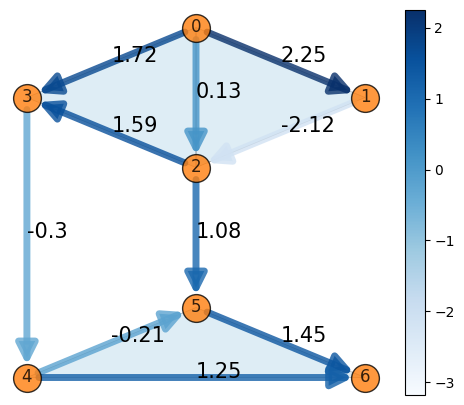

In [13]:
fig = plt.figure(figsize = (6 ,5))
ax = fig.add_subplot(1, 1, 1)

scplot.draw_network(edge_flow=flow, ax=ax)

To retrive the properties of the SC, we can use the SimplicialComplex object. We can retrieve, for example, adjacency matrix, incidence matrices and the Hodge Laplacian matrices using the rank.

In [14]:
sc.adjacency_matrix().toarray()

array([[0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0.]])

In [15]:
# incidence matrix - B1
sc.incidence_matrix(rank=1).toarray()

array([[-1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -1., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]])

In [17]:
# incidence matrix - B2
sc.incidence_matrix(rank=2).toarray()

array([[ 1.,  0.,  0.],
       [-1.,  1.,  0.],
       [ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0., -1.],
       [ 0.,  0.,  1.]])

In [18]:
# get faces of the SC
sc.get_faces(simplex=(4, 5, 6))

[(4, 5), (4, 6), (5, 6)]

### Generate a random SC

We can also generate a random SC in the following way.

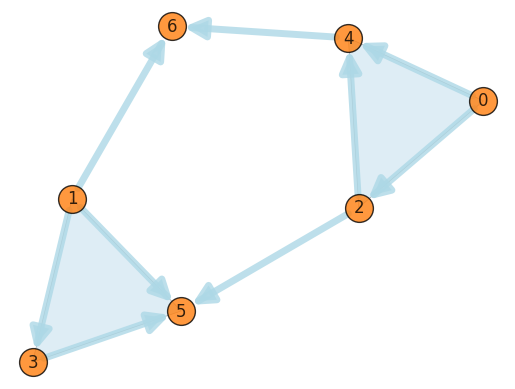

In [44]:
from pytspl import generate_random_simplicial_complex

sc, coordinates = generate_random_simplicial_complex(
    num_of_nodes=7,
    p=0.25,
    seed=42,
    dist_threshold=0.8
)

scplot = SCPlot(sc, coordinates)
scplot.draw_network()